# Visualize Results and Rank Single Models Used for Code Generation
1. 14 small language models (SLMs) were tested on 4 code generation datasets.
2. Metric used - Pass@1
3. This notebooks load raw results into the `df` dataframe, applies the MinMaxScaler to normalize the results because they are in different ranges, and ranks SLMs based on their average performance across the 4 code generation datasets.
4. This notebook also visualizes the results by dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 1. Original Results from All Models Run on All Datasets

In [2]:
file = '/Users/andrew/Documents/04_git/Praxis/documents/2_docs/indiv_model_results_for_plotting.xlsx'
df = pd.read_excel(file)

In [3]:
# original results from all the experiments
df

,Model,HumanEval_Full,HumanEval_Complete,MBPP,LBPP,Big_Code_Bench
0,Nxcode-CQ-7B-orpo,0.8293,0.75610,0.730,0.2284,0.240
1,Codestral Mamba,0.7561,0.60370,0.394,0.2654,0.230
2,Ministral 8B,0.7256,0.71340,0.562,0.2222,0.246
3,Deepseek-Coder,0.6524,0.70730,0.010,0.0000,0.322
4,Ministral 3B,0.6463,0.61590,0.518,0.2099,0.268
5,Mistral-Nemo,0.5854,0.53050,0.474,0.2160,0.172
6,Llama 3.1 8B,0.6590,0.55470,0.568,0.2160,0.298
7,CodeQwen-7B,0.5000,0.54880,0.552,0.1975,0.268
8,OpenCodeInterpreter,0.4100,0.71950,0.054,0.0800,0.322
9,Mistral 7B,0.3110,0.35980,0.136,0.0990,0.156


## 2. Visualizing by Dataset

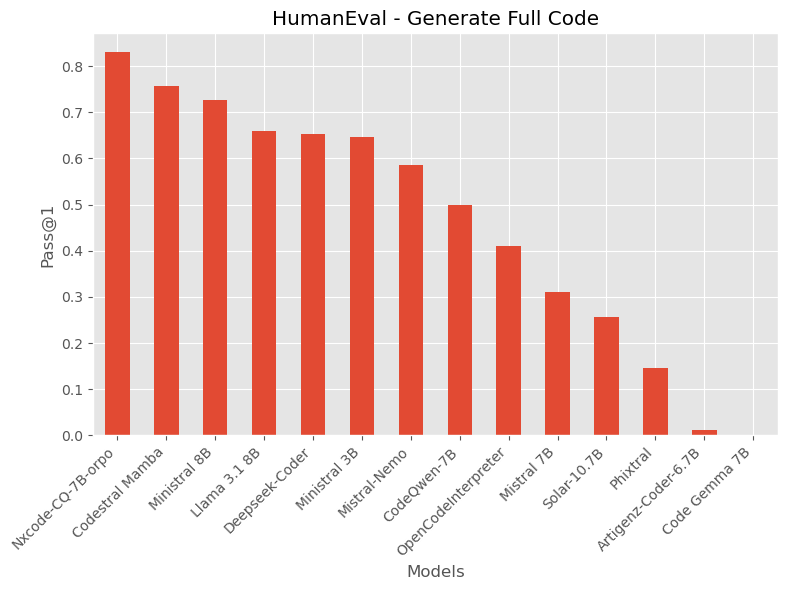

In [4]:
# single model's plot
plt.style.use('ggplot')
df.sort_values('HumanEval_Full', ascending=False).plot( x='Model', y='HumanEval_Full',
                                                        kind='bar', legend=False, figsize=(8,6))

# Add plot title and axis labels
plt.title("HumanEval - Generate Full Code")
plt.xlabel("Models")
plt.ylabel("Pass@1")

plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()  # optional, makes layout a bit nicer
plt.show()

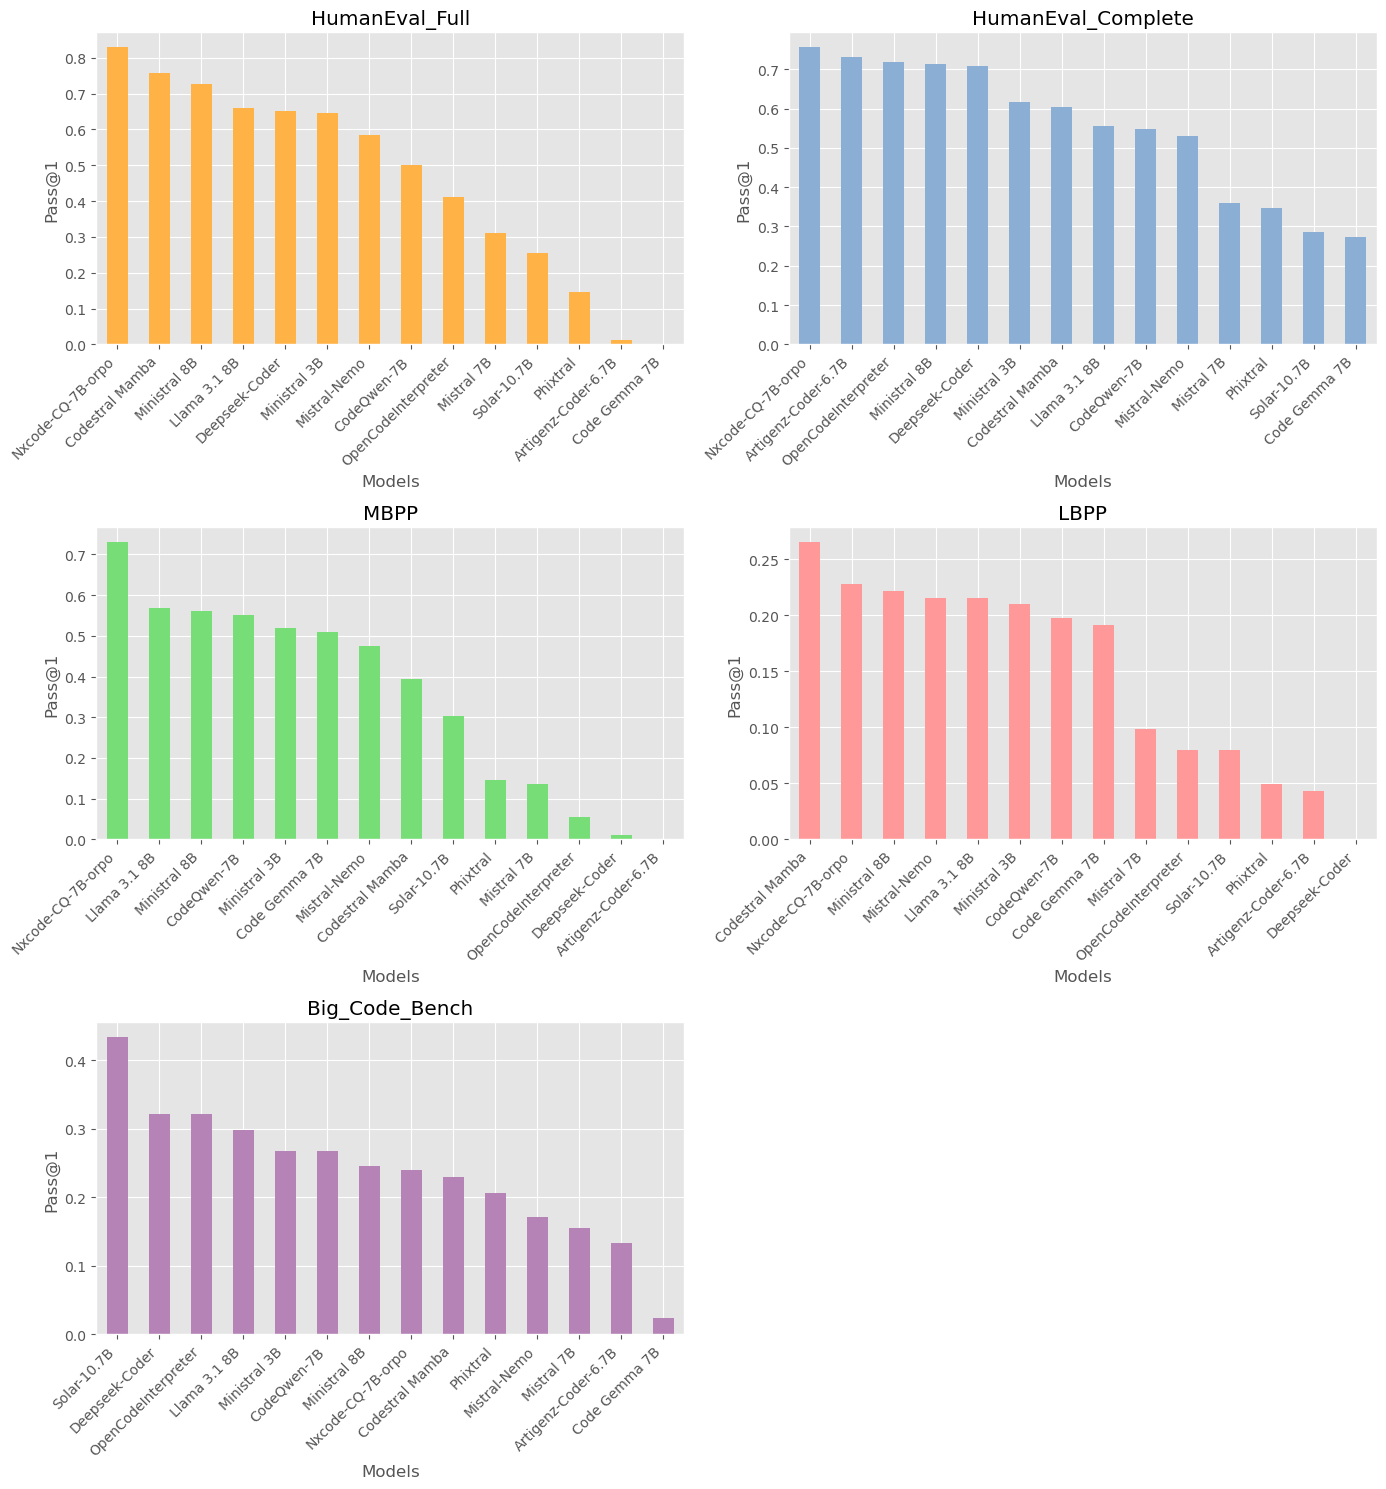

In [5]:
# all models' plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
cols = ['HumanEval_Full', 'HumanEval_Complete', 'MBPP', 'LBPP', 'Big_Code_Bench']

pastel_colors = [
    "#FFB347",  # Pastel orange
    "#8BAED5",  # Pastel blue
    "#77DD77",  # Pastel green
    "#FF9999",  # Pastel gray
    "#B683B6"   # Pastel purple
]

# figsize=(8,6)
for i, (ax, col) in enumerate(zip(axes.flat, cols)):
    df.sort_values(col, ascending=False).plot(
        x='Model', 
        y=col, 
        kind='bar', 
        legend=False, 
        ax=ax,
        color=pastel_colors[i]
    )
    
    ax.set_title(f"{col}")
    ax.set_xlabel("Models")
    ax.set_ylabel('Pass@1')
    ax.tick_params(axis='x', rotation=45,)  # ha='right',  fontsize=10
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

# hide plot 6
if len(cols) < len(axes.flat):
    for ax in axes.flat[len(cols):]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


## 3. Scaling Results and Ranking Models

In [10]:
# scaling results to calculate the rank of each model
from sklearn.preprocessing import MinMaxScaler

df_text = df[['Model']]                        # just the text column(s)
df_numeric = df.drop(columns=['Model'])        # remaining numeric columns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=df_numeric.columns,
    index=df_numeric.index
)
df_scaled['Average'] = df_scaled.mean(axis=1)
df_result = df_text.join(df_scaled)

df_result.sort_values(by='Average', ascending=False)

,Model,HumanEval_Full,HumanEval_Complete,MBPP,LBPP,Big_Code_Bench,Average
0,Nxcode-CQ-7B-orpo,1.000000,1.000000,1.000000,0.860588,0.526829,0.877483
2,Ministral 8B,0.874955,0.911356,0.769231,0.837227,0.541463,0.786846
1,Codestral Mamba,0.911733,0.683621,0.538462,1.000000,0.502439,0.727251
6,Llama 3.1 8B,0.794646,0.581897,0.777473,0.813866,0.668293,0.727235
4,Ministral 3B,0.779332,0.708947,0.708791,0.790882,0.595122,0.716615
7,CodeQwen-7B,0.602918,0.569649,0.755495,0.744160,0.595122,0.653469
5,Mistral-Nemo,0.705897,0.531659,0.648352,0.813866,0.360976,0.612150
8,OpenCodeInterpreter,0.494393,0.924019,0.071429,0.301432,0.726829,0.503620
3,Deepseek-Coder,0.786688,0.898692,0.010989,0.000000,0.726829,0.484640
12,Solar-10.7B,0.308815,0.025119,0.414835,0.301432,1.000000,0.410040
